# Proyecto 1er Parcial - Bases de Programación 
**Facultad de Ingeniería en Ciencias de la Tierra**

*Maestría en Ciencias de la Tierra*

**Integrantes:** Jairo Dueñas, Cindy Goyburo, Jabid Martínez

# Introducción

<p style="text-align: justify;">El uso de la analítica de datos ha revolucionado el tratamiento de grandes bases de datos, permitiendo obtener resultados en tiempos muy cortos[1][2]. En el presente proyecto, 
    se trabajó con una base de aproximadamente 1 millón de datos climáticos, que incluía información sobre temperaturas, precipitaciones, niveles de humedad, y patrones de viento, abarcando diferentes fechas 
    y horas. A través de librerías y métodos de Python en la interfaz de Jupyter Notebook, se limpió y procesó todos los registros[3].</p>

<p style="text-align: justify;">El análisis secuencial de los datos permitió obtener información relevante, como estadísticas generales, y realizar agrupaciones por columnas específicas para el cálculo de 
    medianas y máximos. La implementación de funciones reutilizables optimizó significativamente el tiempo y los recursos, facilitando la repetición de análisis similares en el futuro[3].</p>

<p style="text-align: justify;">Además, la visualización de datos numéricos y categóricos facilitó la identificación de comportamientos y tendencias climáticas, así como el reconocimiento de valores atípicos. 
    Estas visualizaciones no solo ayudaron a comprender mejor los datos, sino que también proporcionaron una base sólida para la toma de decisiones informadas en el ámbito del estudio climático[1][4].</p>

<p style="text-align: justify;">En resumen, este proyecto no solo demostró la eficiencia y efectividad de la analítica de datos en el manejo de grandes volúmenes de información, sino que también resaltó la 
    importancia de implementar tecnologías actuales que se encuentran disponibles.</p>



# Objetivo

Automatizar el proceso de carga, limpieza, análisis y visualización de un conjuntos de datos climáticos mediante en uso de librerías y funciones en python para mejorar la eficiencia y la reproducibilidad del análisis de la información.

## Carga de datos y librerías a utilizar

Las librerías a utilizar en este proyecto son de dos tipos, aquellas necesarias para la de datos, . Por otro lado, **matplotlib** y **seaborn** serán útiles en la representación gráfica del conjunto de datos, 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descripción del conjunto de datos

El conjunto de datos a utilizar corresponde a datos hidrometeorológicos multitemporales de diversas ciudades de los Estados Unidos. 

### Carga del conjunto de datos utilizando pandas

Para la carga de la información y su conversión en un DataFrame se usó el método de pandas (pd.read_csv), el cual toma como argumento la ruta entre comillas en la que se encuentra el archivo objetivo ("Weather_Data-1.csv"). Adicionalmente, se hace uso del método **head()**, para observar las cinco primeras entradas de acuerdo con su posición de índice.

In [2]:
weather_data = pd.read_csv("Weather_Data-1.csv")
weather_data.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,1/14/2024 21:12,10.683001,41.195754,4.020119,8.233540
1,San Diego,5/17/2024 15:22,8.734140,58.319107,9.111623,27.715161
2,San Diego,5/11/2024 9:30,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2/26/2024 17:32,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,4/29/2024 13:23,39.808213,72.899908,9.598282,29.898622


A continuación, para conocer el detalle de las cinco columnas que contiene el archivo se detalla a continuación:

- **Location:** Dato tipo "str" que aloja el nombre de las ciudades de Estados Unidos con 
- **Date_Time:** Dato tipo "str" que aloja la fecha y hora a la que fueron registrados los datos hidrometeorológicos.
- **Temperature_C:** Dato tipo "float" que guarda el valor de la temperatura registrada en grados Celsius (°C)
- **Humidity_pct:** Dato tipo "float" que contiene el valor de la humedad en porcentaje (%)
- **Precipitation_mm:** Dato tipo "float", que guarda el valor de la precipitación en mm
- **Wind_Speed_kmh:** Dato tipo "float", que almacena el valor de la velocidad del viento en km/h

De igual manera se realiza una limpieza básica de datos, con el objetivo de eliminar datos duplicados con el método **.drop_duplicates(inplace=True)**. y luego observar la cantidad de datos no nulos y su tipo con **.info()**.

In [3]:
#Limpieza básica de datos, eliminando duplicados
weather_data.drop_duplicates(subset=['Location', 'Date_Time'], inplace=True)
#weather_data.drop_duplicates(inplace=True)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786469 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          786469 non-null  object 
 1   Date_Time         786469 non-null  object 
 2   Temperature_C     786469 non-null  float64
 3   Humidity_pct      786469 non-null  float64
 4   Precipitation_mm  786469 non-null  float64
 5   Wind_Speed_kmh    786469 non-null  float64
dtypes: float64(4), object(2)
memory usage: 42.0+ MB


Al ver el resultado anterior se puede ver como la columna **Date_Time** es de tipo objeto. Para una mejor manipulación de los datos de fecha se lo cambiará a datetime64 *(formato de fecha)*, usando el método de pandas **.to_datetime**, y observar si se ha cambiado con **.info()**.

In [4]:
weather_data["Date_Time"] = pd.to_datetime(weather_data["Date_Time"])
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786469 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Location          786469 non-null  object        
 1   Date_Time         786469 non-null  datetime64[ns]
 2   Temperature_C     786469 non-null  float64       
 3   Humidity_pct      786469 non-null  float64       
 4   Precipitation_mm  786469 non-null  float64       
 5   Wind_Speed_kmh    786469 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 42.0+ MB


A continuación se presentan dos funciones que hacen los procesos previos sin necesidad de volver a repetir el código, **eliminar_duplicados** para eliminar duplicados usando el método *.drop_duplicates(inplace=True)*, **tipo_fecha** que modifica el tipo de una columna de object ("str") a datetime64.

In [5]:
#Aplicando funciones

def eliminar_duplicados(data, keep="First"):
    return data.drop_duplicates(inplace=True)
    
def tipo_fecha(data):
    data["Date_Time"] = pd.to_datetime(data["Date_Time"])
    return data
    
sin_dup = eliminar_duplicados(weather_data)
tipo_fecha = tipo_fecha(weather_data)

print(f"Data limpia:")
print(weather_data)
print()
print(f"Verificación del tipo de cada columna:")
print(weather_data.info())


Data limpia:
            Location           Date_Time  Temperature_C  Humidity_pct  \
0          San Diego 2024-01-14 21:12:00      10.683001     41.195754   
1          San Diego 2024-05-17 15:22:00       8.734140     58.319107   
2          San Diego 2024-05-11 09:30:00      11.632436     38.820175   
3       Philadelphia 2024-02-26 17:32:00      -8.628976     54.074474   
4        San Antonio 2024-04-29 13:23:00      39.808213     72.899908   
...              ...                 ...            ...           ...   
999990      New York 2024-01-01 11:49:00      20.245916     31.677558   
999991      New York 2024-02-14 03:55:00       4.210758     45.683075   
999992      San Jose 2024-01-22 15:43:00      14.067557     45.668296   
999995        Dallas 2024-01-01 20:29:00      23.416877     37.705024   
999999      New York 2024-04-16 16:11:00      10.725351     43.804584   

        Precipitation_mm  Wind_Speed_kmh  
0               4.020119        8.233540  
1               9.111623

En la siguiente celda de código se presenta un resumen estadístico de los datos para cada una de las cinco variables del estudio usando el método **.describe()**. Este método presenta ocho métricas de cada columna del DataFrame, las mismas que son detalladas a continuación:

- **count:** Presenta el número total de datos de la columna
- **mean:** Calcula el promedio de los datos de la columna
- **min:** Calcula el valor mínimo de los datos de la columna
- **25%:** Correspondiente al valor del primer cuartil
- **50%:** También conocida como la mediana de los datos,
- **75%:** Valor correspondiente al
- **max:** Devuelve el máximo valor del conjunto
- **std:** Calcula la desviación estándar del conjunto de datos de la columna


In [6]:
weather_data.describe()

,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,786469,786469.000000,786469.000000,786469.000000,786469.000000
mean,2024-03-10 10:30:46.594792960,14.767244,60.029866,5.107317,15.001548
min,2024-01-01 00:00:00,-19.969311,30.000009,0.000009,0.000051
25%,2024-02-04 16:54:00,2.260914,45.041518,2.575863,7.497307
50%,2024-03-10 11:34:00,14.759720,60.025753,5.104687,14.997622
75%,2024-04-14 03:28:00,27.256960,75.033459,7.613750,22.514125
max,2024-05-18 19:44:00,39.999801,89.999977,14.926332,29.999973
std,NaN,14.484573,17.314466,2.949482,8.662800


Finalmente, para tener una mejor presentación del DataFrame, es posible realizar un cambio en los nombres de las columnas mediante el método **.rename()**. Este método reemplaza al igual que un diccionario donde se coloca entre comillas el nombre de la columna a la que deseamos cambiar de nombre.

In [7]:
weather_data.rename(columns={"Date_Time":"Date Time","Temperature_C":"Temperature (°C)", "Humidity_pct":"Humidity (pct)","Precipitation_mm":"Precipitation (mm)", "Wind_Speed_kmh":"Wind Speed (kmh)" }, inplace=True)
weather_data.head()

weather_data.Location.value_counts()

Location
Phoenix         78806
Houston         78787
Chicago         78734
San Antonio     78706
Dallas          78700
Philadelphia    78678
San Jose        78611
San Diego       78528
New York        78514
Los Angeles     78405
Name: count, dtype: int64

## Análisis exploratorio de datos

### Utilizar estructuras de datos para almacenar y manipular información

Tomando en cuenta que el lugar y la fecha son parámetros fijos, se asignarán a una tupla, para que no puedan ser modificados.

In [8]:
tupla_location = weather_data.apply(lambda row: (row["Location"], row["Date Time"]), axis=1)
print(tupla_location)

0            (San Diego, 2024-01-14 21:12:00)
1            (San Diego, 2024-05-17 15:22:00)
2            (San Diego, 2024-05-11 09:30:00)
3         (Philadelphia, 2024-02-26 17:32:00)
4          (San Antonio, 2024-04-29 13:23:00)
                         ...                 
999990        (New York, 2024-01-01 11:49:00)
999991        (New York, 2024-02-14 03:55:00)
999992        (San Jose, 2024-01-22 15:43:00)
999995          (Dallas, 2024-01-01 20:29:00)
999999        (New York, 2024-04-16 16:11:00)
Length: 786469, dtype: object


Los parámetros **Temperatura, Humedad, Precipitación y Velocidad del viento** son parámetros inestables y que además me pueden servir para realizar operaciones estadísticas. Por esta razón se almacenarán en un diccionario.

In [9]:
Location_list = weather_data["Location"].to_list()
Date_list = weather_data["Date Time"].to_list()
Temp_list = weather_data["Temperature (°C)"].to_list()
Humed_list = weather_data["Humidity (pct)"].to_list()
Precip_list = weather_data["Precipitation (mm)"].to_list()
Wind_list = weather_data["Wind Speed (kmh)"].to_list()

Se creó la función **estadistica** que recibe un array y devuelve tres valores: **media**,**mediana**, y **desviación estándar**. En adición, se usa la función **round()** para redondear a 2 decimales.

In [10]:
def estadistica(variable):
    media= np.mean(variable)
    mediana = np.median(variable)
    std = np.std(variable)
    return round(media,2),round(mediana,2), round(std,2)

Temperatura = estadistica(Temp_list)
print( f"La media, mediana y desviación estándar de la Temperatura es",Temperatura[0],",",Temperatura[1],",",Temperatura[2],"respectivamente.")
Humedad = estadistica(Humed_list)
print( f"La media, mediana y desviación estándar de la Humedad es",Humedad[0],",",Humedad[1],",",Humedad[2],"respectivamente.")
Precipitacion = estadistica(Precip_list)
print( f"La media, mediana y desviación estándar de la Precipitación es",Precipitacion[0],",",Precipitacion[1],",",Precipitacion[2], "respectivamente.")
Vel_viento = estadistica(Wind_list)
print( f"La media, mediana y desviación estándar de la Velocidad del viento es",Vel_viento[0],",",Vel_viento[1],",",Vel_viento[2], "respectivamente.")

La media, mediana y desviación estándar de la Temperatura es 14.77 , 14.76 , 14.48 respectivamente.
La media, mediana y desviación estándar de la Humedad es 60.03 , 60.03 , 17.31 respectivamente.
La media, mediana y desviación estándar de la Precipitación es 5.11 , 5.1 , 2.95 respectivamente.
La media, mediana y desviación estándar de la Velocidad del viento es 15.0 , 15.0 , 8.66 respectivamente.


A continuación se crean tres funciones. La primera **temp_alta** toma los datos y devuelve el nombre del mes con la temperatura media más alta en inglés *(por defecto al usar .strfttime("%B"))*. La segunda **mas_precip** toma los datos y devuelve el valor en número del año con la precipitación más alta *(por defecto al usar .year)*. Mientras la tercera **mas_viento** toma los datos y devuelve el nombre de la ciudad con la velocidad del viento más alta.

In [11]:
#Análisis específico del conjunto de datos.

#Mes con la temperatura promedio más alta
def temp_alta(data):
    promedio_mes = data.groupby("Date Time")["Temperature (°C)"].mean()
    mes = promedio_mes.idxmax()
    
    return mes.strftime('%B')
    
mes = temp_alta(weather_data)
print(f"El mes con la temperatura más alta promedio es", mes)

# #Año con más precipitaciones
def mas_precip(data):
    promedio_año = data.groupby("Date Time")["Precipitation (mm)"].mean()
    año = promedio_año.idxmax()

    return año.year
    
año = mas_precip(weather_data)
print(f"El año con el mayor volumen de precipitación es", año)

#Ciudad que tenga las velocidades del viendo más altas
def mas_viento(data):
    prom_ciudad = data.groupby("Location")["Wind Speed (kmh)"].mean()
    ciudad = prom_ciudad.idxmax()
    
    return ciudad

ciudad = mas_viento(weather_data)
print(f"La ciudad con velocidades del viento más altas es", ciudad)

El mes con la temperatura más alta promedio es March
El año con el mayor volumen de precipitación es 2024
La ciudad con velocidades del viento más altas es San Diego


## Manipulación de datos con Pandas

### Crear funciones para realizar operaciones de agrupamiento y agregación

A continuación se creó una función para la agrupación de los datos por columnas llamada **sumar_agrupar**.

In [12]:
# Agruparemos la información de los datos por columnas y haremos una suma

def sumar_agrupar(data, column, suma):
    agrupado = data.groupby(column)[suma].sum().reset_index()
    return agrupado
    
suma = sumar_agrupar(weather_data, "Location", "Precipitation (mm)")
print("Suma de la temperatura por ubicación:")
suma

Suma de la temperatura por ubicación:


,Location,Precipitation (mm)
0,Chicago,393771.214505
1,Dallas,393033.139249
2,Houston,394151.632236
3,Los Angeles,391932.008809
4,New York,391756.084174
5,Philadelphia,393743.980883
6,Phoenix,480064.611482
7,San Antonio,393737.371264
8,San Diego,393071.200297
9,San Jose,391485.556942


De igual manera, se agrupará la información de los datos por columnas y calcular la media mediante la función **prom_agrupar**. En el ejemplo, se pueden ver la temperatura media de diez ciudades de Estados Unidos.

In [13]:
def prom_agrupar(data, column, prom): 
    agrupado = data.groupby(column)[prom].mean().reset_index()
    return agrupado

media = prom_agrupar(weather_data, "Location", "Temperature (°C)")
media 

,Location,Temperature (°C)
0,Chicago,15.045266
1,Dallas,14.973336
2,Houston,14.893002
3,Los Angeles,15.121807
4,New York,14.997349
5,Philadelphia,14.985475
6,Phoenix,12.758808
7,San Antonio,15.037004
8,San Diego,14.917072
9,San Jose,14.948212


A continuación se crea la función **agrupar_agregar**, que toma cuatro argumentos, el primero corresponde a los datos, el segundo entre comillas el nombre de la columna por la cual se desea agrupar y el tercero es una lista de parámetros *suma, promedio y conteo de datos de velocidad del viento*.

In [14]:
# Agruparemos y agregaremos información de los datos 

def agrupar_agregar(data, column, agg_colum, funciones_agregacion): 
    agrupado = data.groupby(column).agg({agg_colum: funciones_agregacion})
    return agrupado
    
agg = agrupar_agregar(weather_data, "Location", "Wind Speed (kmh)",["sum", "mean", "count"]).reset_index()
print("Multiples agregaciones por ubicación:")
agg

Multiples agregaciones por ubicación:


Location Wind Speed (kmh)                  
                             sum       mean  count
0       Chicago     1.181341e+06  15.004210  78734
1        Dallas     1.183506e+06  15.038196  78700
2       Houston     1.180984e+06  14.989573  78787
3   Los Angeles     1.179071e+06  15.038213  78405
4      New York     1.178390e+06  15.008664  78514
5  Philadelphia     1.178460e+06  14.978270  78678
6       Phoenix     1.180094e+06  14.974672  78806
7   San Antonio     1.178029e+06  14.967463  78706
8     San Diego     1.181356e+06  15.043758  78528
9      San Jose     1.177020e+06  14.972719  78611

### Filtrar y selecciona datos utilizando métodos avanzados de Pandas

A continuación se presentan varios tipos de filtrados de pandas. El primero sigue la siguiente sintaxis DataFrame[condición]. Donde dicha condición convencionalmente lleva la forma **DataFrame["columna"] (operador lógico) valor**. Adicionalmente, para ver los datos se hace uso del método **head()**. En el ejemplo se identifican las ubicaciones con temperaturas por encima de los 25°C con la línea de **código:  weather_data[weather_data["Temperature (°C)"] > 23]**.

In [15]:
weather_data[weather_data["Temperature (°C)"] > 23].head()

,Location,Date Time,Temperature (°C),Humidity (pct),Precipitation (mm),Wind Speed (kmh)
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622
5,San Diego,2024-01-21 08:54:00,27.341055,49.023236,9.166543,27.473896
10,New York,2024-03-04 13:47:00,35.145559,54.752866,8.349195,25.430310
12,Dallas,2024-02-27 21:07:00,32.016898,53.194371,3.552671,3.050196
13,Houston,2024-05-09 00:53:00,38.641269,85.952726,0.470782,20.779264


Análogamente se puede usar métodos como **.loc()** que entre corchetes recibe dos valores, el primero se trata de la condición mediante la cual deseamos realizar nuestro filtrado, y el segundo corresponde a una lista con los nombres de las columnas que deseamos que aparezcan. Como puede verse en la línea de código para humedad mayor a 50 y precipitación mayor a 10.

In [16]:
weather_data.loc[((weather_data["Humidity (pct)"] >50) & (weather_data["Precipitation (mm)"]> 10)),["Location","Humidity (pct)","Precipitation (mm)"]].tail()

,Location,Humidity (pct),Precipitation (mm)
998016,Phoenix,85.219993,13.323627
998194,Phoenix,89.013263,13.805153
999041,Phoenix,88.889294,14.567314
999244,Phoenix,88.986050,10.657797
999944,Phoenix,81.452910,12.680833


Se realiza una función para ilustrar el creado de nuevas columnas derivadas de datos existentes. Como ejemplo tenemos a la funcion **sensacion_termica**, que toma dos argumentos *temperatura* y *humedad* y retorna el valor de la humedad en base a una formula definida.

Después se lo agrega al DataFrame mediante la siguiente sintaxis: **weather_data["Thermal sensation"]= weather_data.apply(lambda row: sensacion_termica(row["Temperature (°C)"], row["Humidity (pct)"]), axis =1)**


In [17]:
def sensacion_termica(temperatura, humedad):
    HI= temperatura - ((10.3 - humedad)-10) * ((temperatura - 14.4)/2)
    return HI

weather_data["Thermal sensation"]= weather_data.apply(lambda row: sensacion_termica(row["Temperature (°C)"], row["Humidity (pct)"]), axis =1)
weather_data.head()

,Location,Date Time,Temperature (°C),Humidity (pct),Precipitation (mm),Wind Speed (kmh),Thermal sensation
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540,-65.321735
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161,-155.629936
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951,-41.671083
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303,-627.814508
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622,962.125174


Finalmente dentro de esta etapa del trabajo, se procede a guardar el DataFrame en formato Excel (.xlsx), usando el método **.to_excel()** con el nombre Weather_data_H

In [38]:
#Guardar el DataFrame modificado como archivo de Excel
weather_data.to_excel("weather_data.xlsx", index=False)

In [19]:
# Weather_data_HI2 = pd.read_excel("Weather_data_HI.xlsx")
# Weather_data_HI2

## Resultados

## Visualización de Datos Automatizada

Para realizar la visualización de los datos se requiere de la importación de librerías necesarias como **numpy**, **pandas**, **matplotlib**, y **seaborn**. De igual manera, se importará la librería **warnings** para evitar que en la salida del código se resalten cuadros de texto innecesarios, provocados por la diferencia de versiones de las librerías importadas.

In [20]:
# Importamos todas las librerias necesarias para la visualización de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
weather_data.head()

,Location,Date Time,Temperature (°C),Humidity (pct),Precipitation (mm),Wind Speed (kmh),Thermal sensation
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540,-65.321735
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161,-155.629936
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951,-41.671083
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303,-627.814508
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622,962.125174


In [22]:
media = weather_data.groupby("Location")["Precipitation (mm)"].mean()
media 

Location
Chicago         5.001286
Dallas          4.994068
Houston         5.002750
Los Angeles     4.998814
New York        4.989633
Philadelphia    5.004499
Phoenix         6.091727
San Antonio     5.002635
San Diego       5.005491
San Jose        4.980035
Name: Precipitation (mm), dtype: float64

En este paso, se creó la función **graficos**, la cual recibe datos agrupados como por ejemplo la variable **media** definida previamente, que almacena las precipitaciones medias de diez ciudades de Estados Unidos, y otros tres argumentos tipo "str", relacionados con la personalización del gráfico como título (title), nombre del eje x (xlabel), y nombre del eje y (ylabel).

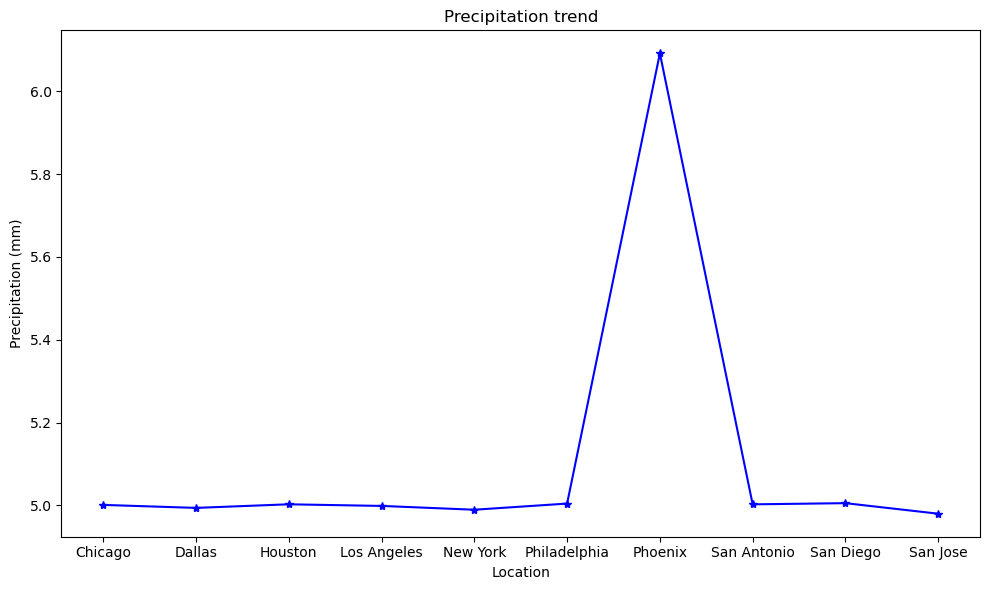

In [23]:
def graficos(data, title, xlabel, ylabel):
    plt.figure(figsize=(10,6))
    plt.plot(data, marker="*", linestyle ="-", color="b")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.xticks(rotation=45) #mejora la legibilidad de las etiquetas del eje x
    plt.tight_layout() #ajustar automáticamente los parámetros de los ejes para que el contenido de los gráficos se ajuste bien a la figura.
    plt.show()

graficos(media, title="Precipitation trend", xlabel="Location", ylabel="Precipitation (mm)")


In [24]:
max_temperatura = weather_data.groupby("Location")["Temperature (°C)"].max()
max_temperatura

Location
Chicago         39.998561
Dallas          39.998804
Houston         39.998913
Los Angeles     39.999592
New York        39.999801
Philadelphia    39.999642
Phoenix         39.998889
San Antonio     39.998314
San Diego       39.999692
San Jose        39.997461
Name: Temperature (°C), dtype: float64

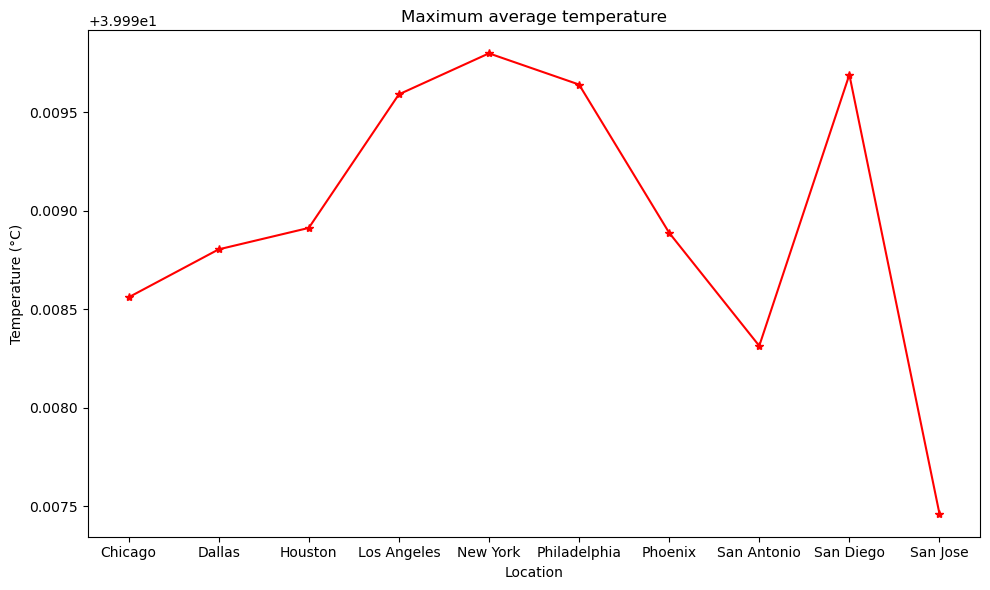

In [25]:
#Gráfico de líneas

def graficos(data, title, xlabel, ylabel):
    plt.figure(figsize=(10,6))
    plt.plot(data, marker="*", linestyle ="-", color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.xticks(rotation=45) #mejora la legibilidad de las etiquetas del eje x
    plt.tight_layout() #ajustar automáticamente los parámetros de los ejes para que el contenido de los gráficos se ajuste bien a la figura.
    plt.show()

graficos(max_temperatura, title="Maximum average temperature", xlabel="Location", ylabel="Temperature (°C)")


In [26]:
count_wind_speed = weather_data.groupby("Location")["Wind Speed (kmh)"].count().reset_index()
count_wind_speed

,Location,Wind Speed (kmh)
0,Chicago,78734
1,Dallas,78700
2,Houston,78787
3,Los Angeles,78405
4,New York,78514
5,Philadelphia,78678
6,Phoenix,78806
7,San Antonio,78706
8,San Diego,78528
9,San Jose,78611


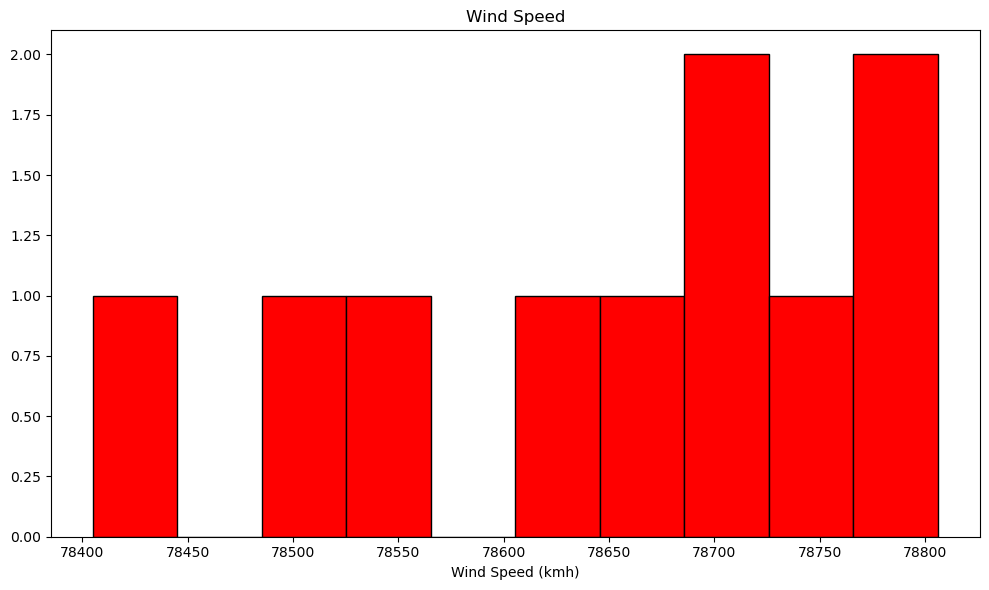

In [27]:
#Gráfico histograma

def graficos(data, title, xlabel, ylabel=None):
    plt.figure(figsize=(10,6))
    plt.hist(data, color="red", edgecolor="k", )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.xticks(rotation=45) #mejora la legibilidad de las etiquetas del eje x
    plt.tight_layout() #ajustar automáticamente los parámetros de los ejes para que el contenido de los gráficos se ajuste bien a la figura.
    plt.show()

graficos(count_wind_speed["Wind Speed (kmh)"], title="Wind Speed", xlabel="Wind Speed (kmh)")


A continuación se creó un script para mostrar la distribución de los datos de la sensación térmica en un boxplot, usando la sintaxis **sns.boxplot**.

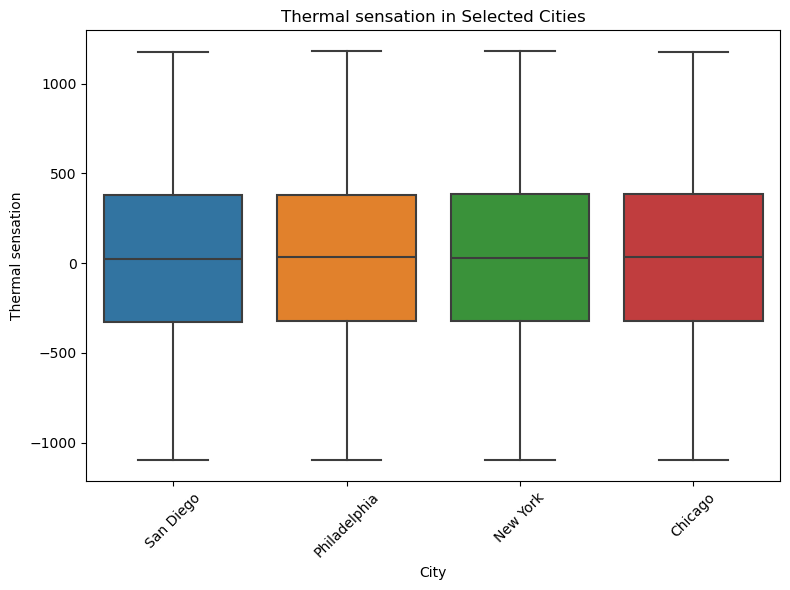

In [28]:
cities = ["New York", "Philadelphia", "Chicago","San Diego"]
# Filtrar los datos para las ciudades específicas
datosprecip_cities = weather_data[weather_data["Location"].isin(cities)]

# Crear el gráfico de caja (boxplot)
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Location", y="Thermal sensation", data=datosprecip_cities, ax=ax)

# Configurar etiquetas y título
ax.set_xlabel("City")
ax.set_ylabel("Thermal sensation")
ax.set_title("Thermal sensation in Selected Cities")

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A continuación se tiene una agrupación para la velocidad promedio, usando los métodos **.groupby**, **.mean**, y **.reset_index**.

In [29]:
# Gráficos de barras
mean_wind_speed = weather_data.groupby("Location")["Wind Speed (kmh)"].mean().reset_index()
mean_wind_speed

,Location,Wind Speed (kmh)
0,Chicago,15.004210
1,Dallas,15.038196
2,Houston,14.989573
3,Los Angeles,15.038213
4,New York,15.008664
5,Philadelphia,14.978270
6,Phoenix,14.974672
7,San Antonio,14.967463
8,San Diego,15.043758
9,San Jose,14.972719


Esto sirvió para realizar una función que genere un gráfico, que reciba el dataframe anterior, y devuelva un diagrama de barras de la velocidad promedio del viento por ciudad.

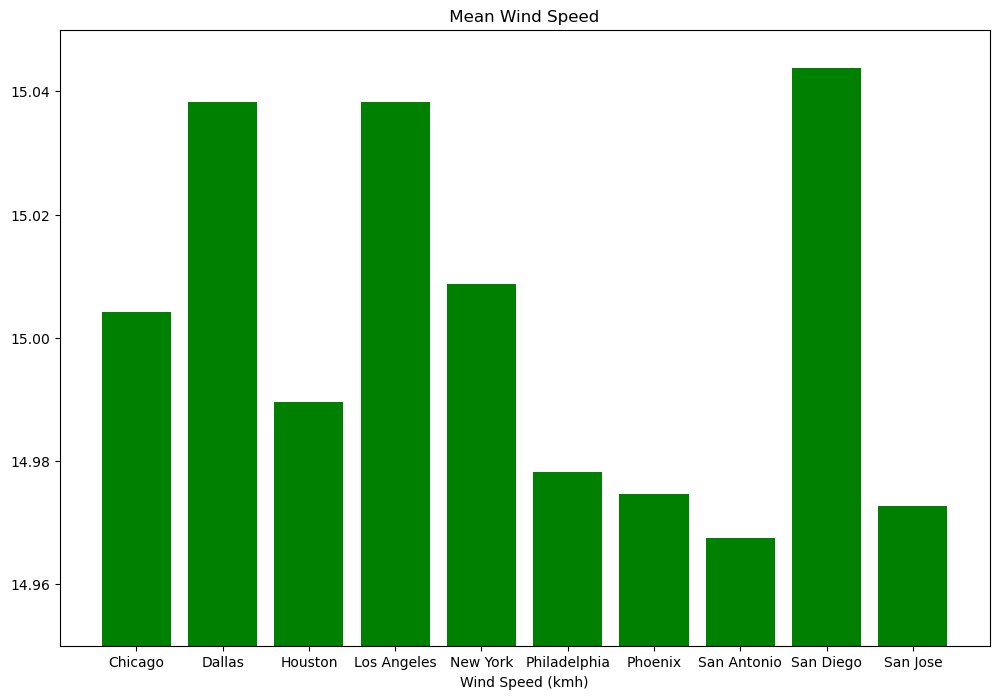

In [30]:
# Gráficos de barras
def grafhist(data, title, xlabel):
    fig, ax = plt.subplots(figsize=(12,8))
    location = np.array(data["Location"])
    w_speed = np.array(data["Wind Speed (kmh)"])
    ax.bar(location, w_speed, color="g")
    ax.set_xlabel(xlabel)
    ax.set_ylim(14.95,15.05)
    #ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

grafhist(mean_wind_speed, title=" Mean Wind Speed ", xlabel="Wind Speed (kmh)")

A continuación se creó la función **histwind**, la cual recibe la data, y en un segundo argumento el Nombre de la ciudad entre comillas, para obtener un gráfico de dispersión de la velocidad promedio del viento en la ciudad escogida en km/h por día.

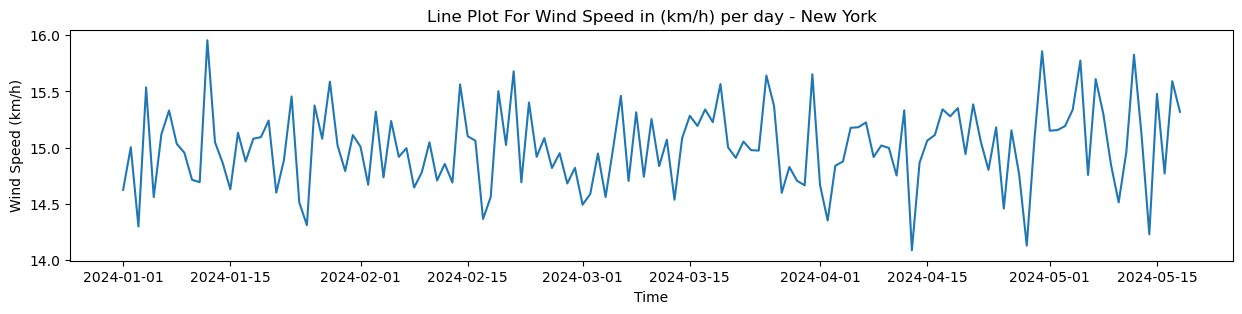

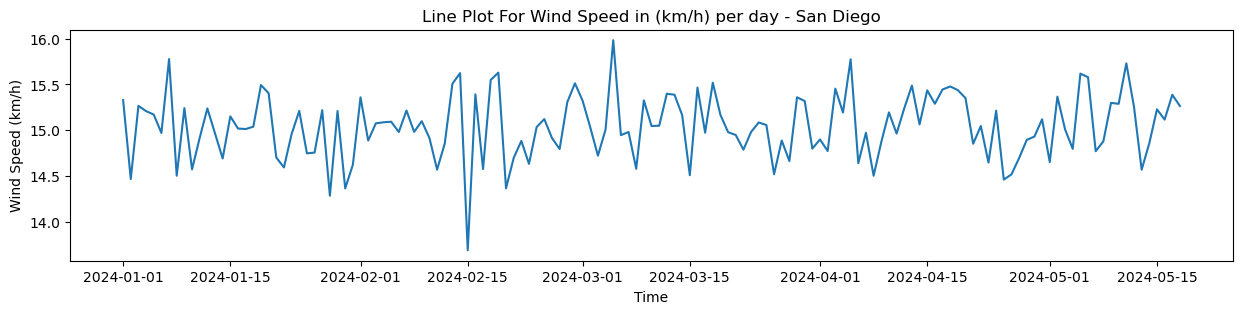

In [31]:
def histwind(data,city):
    data1=data.loc[data["Location"]==city,["Date Time","Wind Speed (kmh)"]].sort_values(by="Date Time")   
    fig, ax = plt.subplots(figsize=(15,3))
    mean_per_day_city = data1.groupby(pd.Grouper(key='Date Time', freq='D')).mean().reset_index()
    sns.lineplot(data=mean_per_day_city, x = "Date Time" , y = "Wind Speed (kmh)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Wind Speed (km/h)")
    ax.set_title(f"Line Plot For Wind Speed in (km/h) per day - {city}")
    
    plt.show()

histwind(weather_data,"New York")

histwind(weather_data,"San Diego")

A continuación se generaron las gráficas de histograma de temperaturas y precipitación para todas las ciudades incluídas en la base de datos.

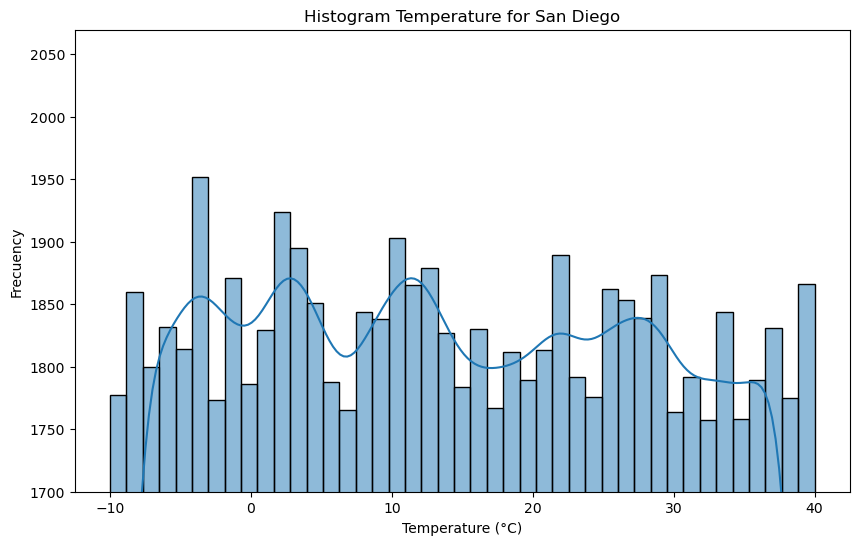

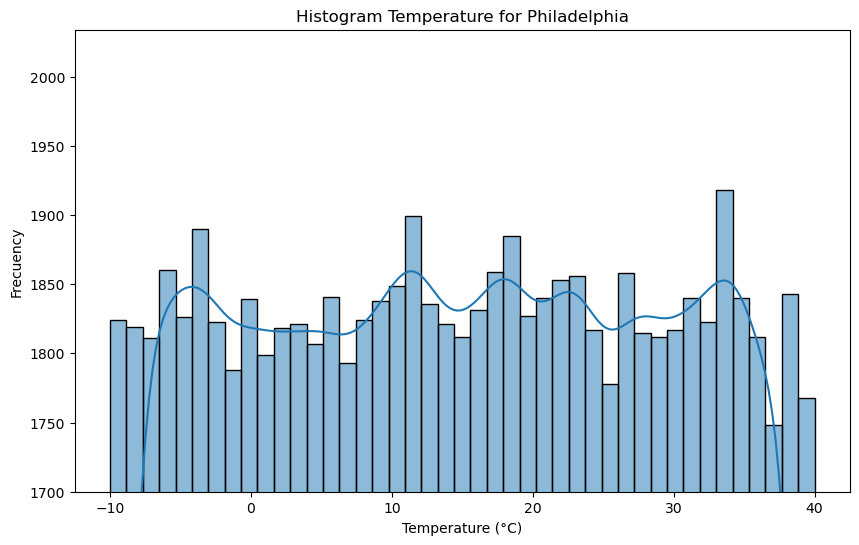

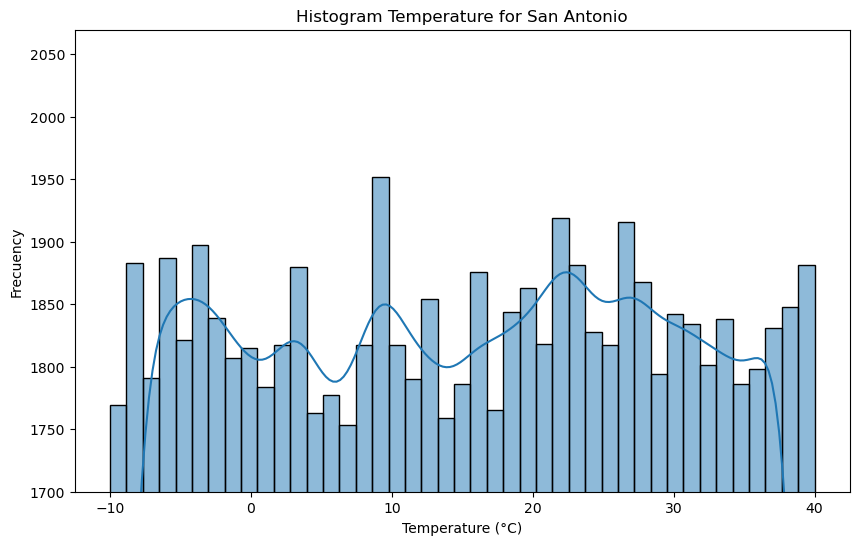

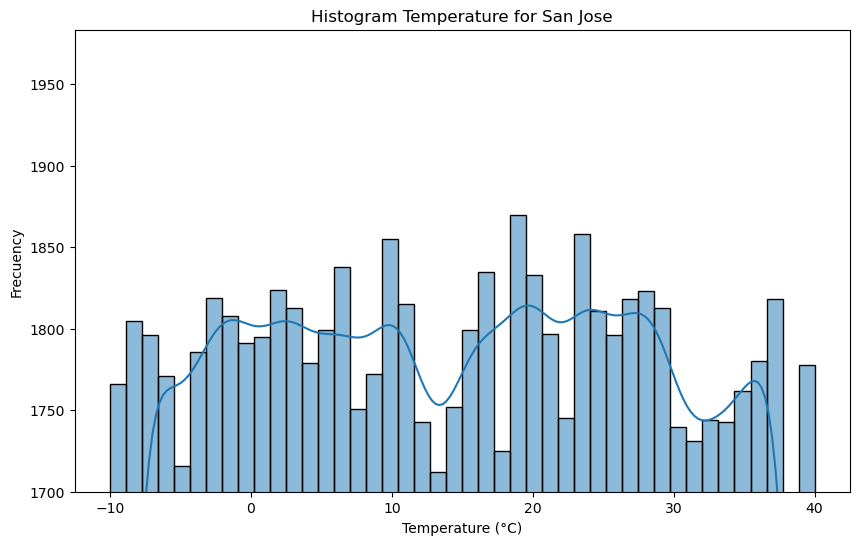

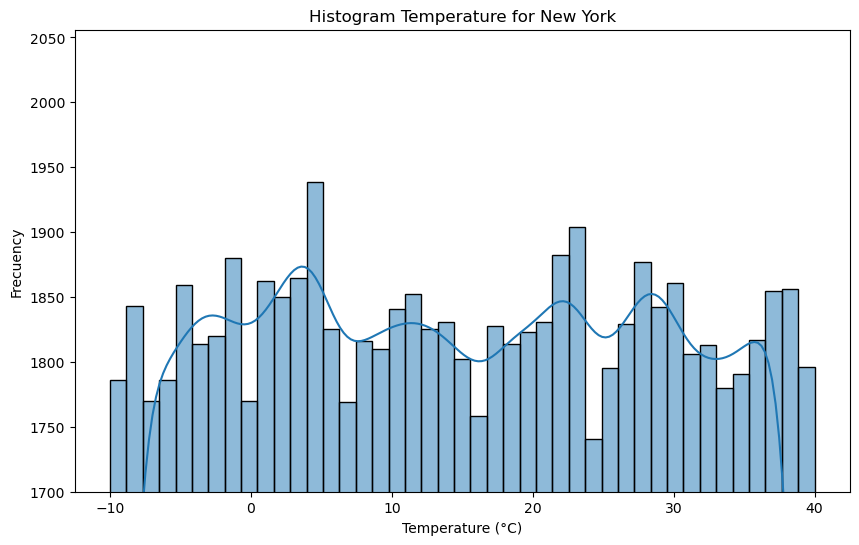

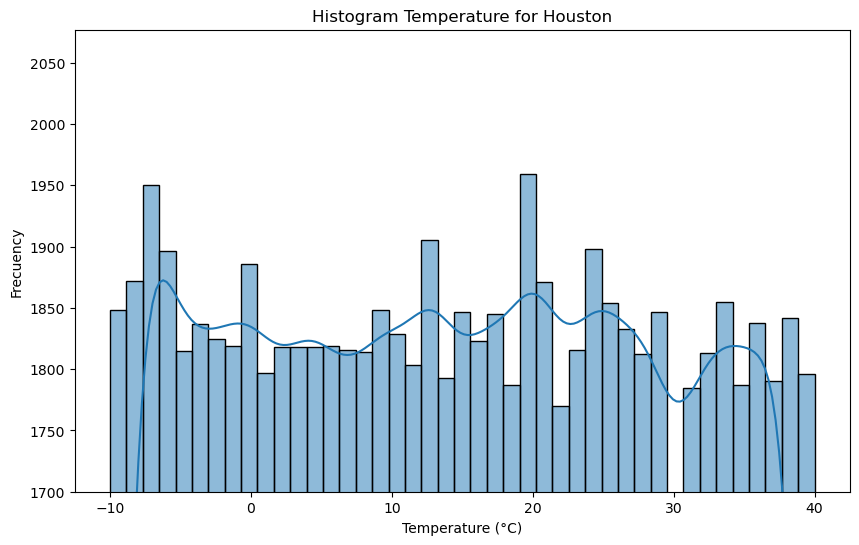

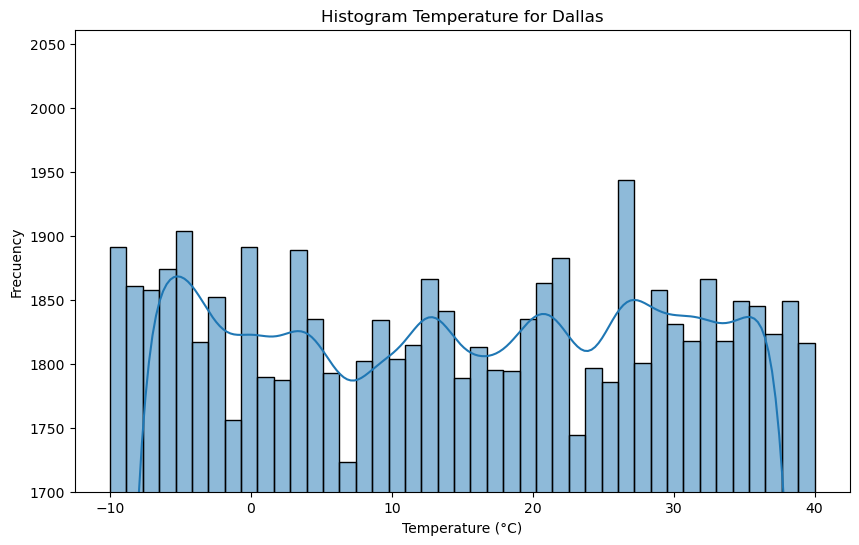

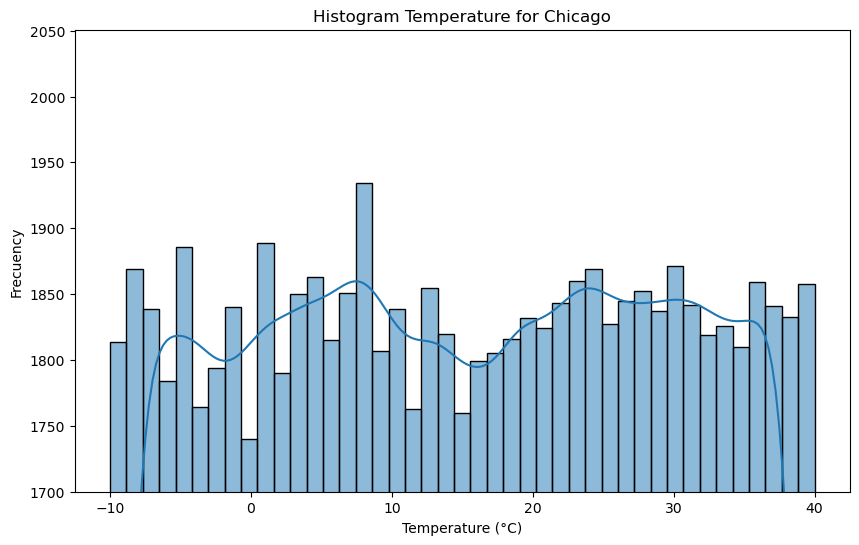

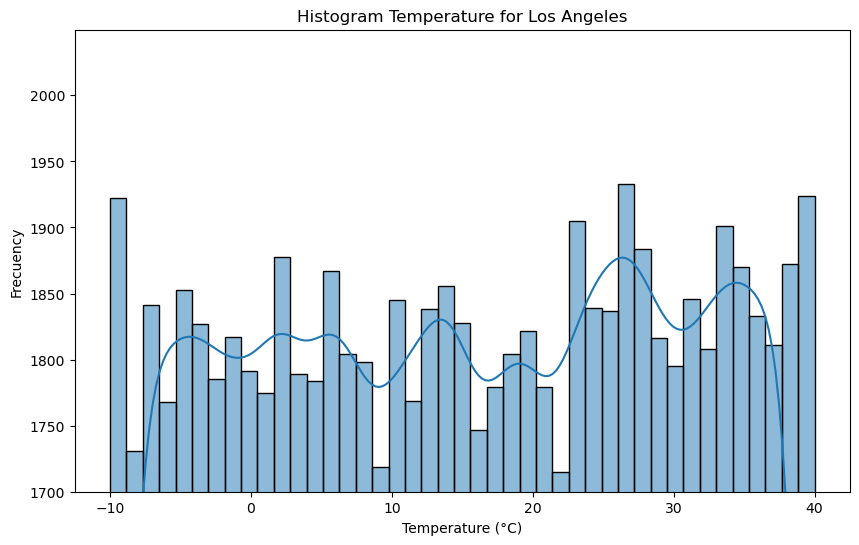

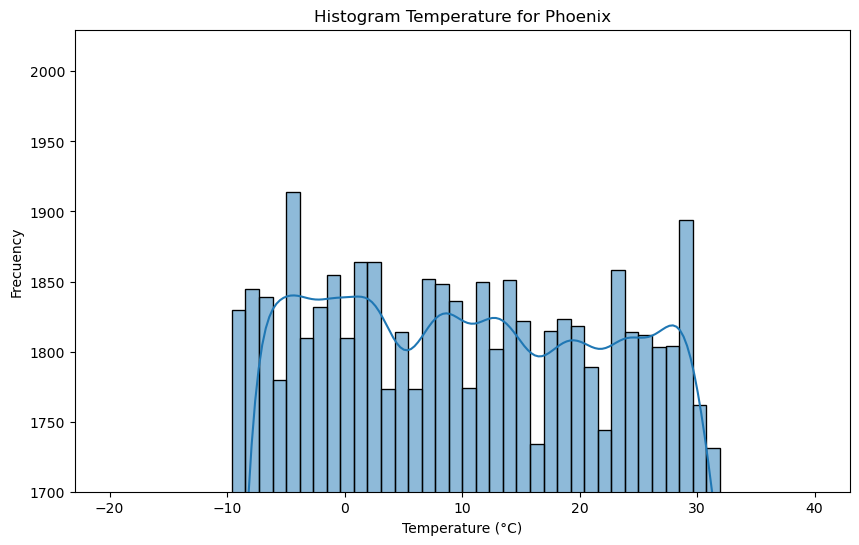

In [32]:
#Función para guardar freuencia de temperatura
def bucle_graficos(data, var1, var2, xlabel, ylabel, title):
    locs = data[var1].unique()
    for loc in locs:
        df_location = data[data[var1]==loc]

        fig, ax = plt.subplots(figsize=(10,6))
        sns.histplot(df_location, x = var2 , kde=True)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_ylim(1700,ax.get_ylim()[1] +20)
        ax.set_title(f"{title} for {loc}")
        plt.show()

        fig_filname = f"Temperature_{loc}.png"
    fig.savefig(fig_filname, dpi=400)
        
        
bucle_graficos(weather_data, var1="Location", var2="Temperature (°C)", xlabel="Temperature (°C)", ylabel="Frecuency",  title= "Histogram Temperature")

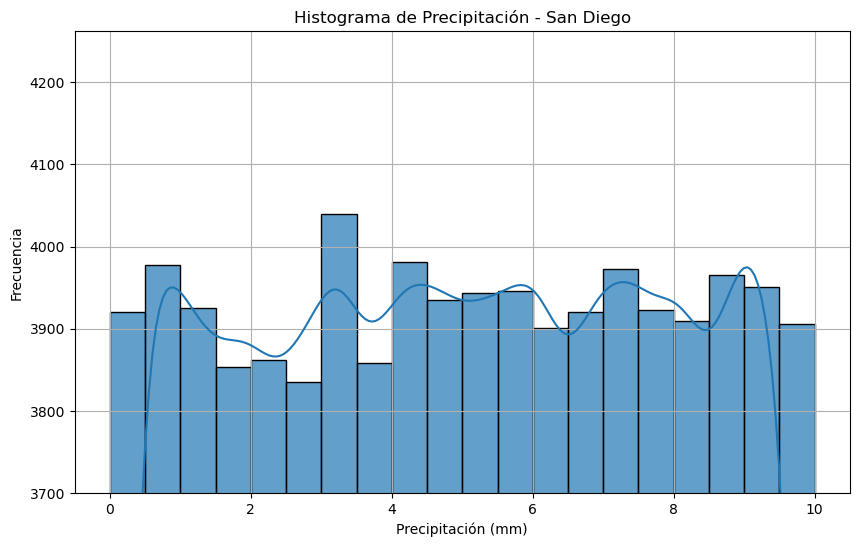

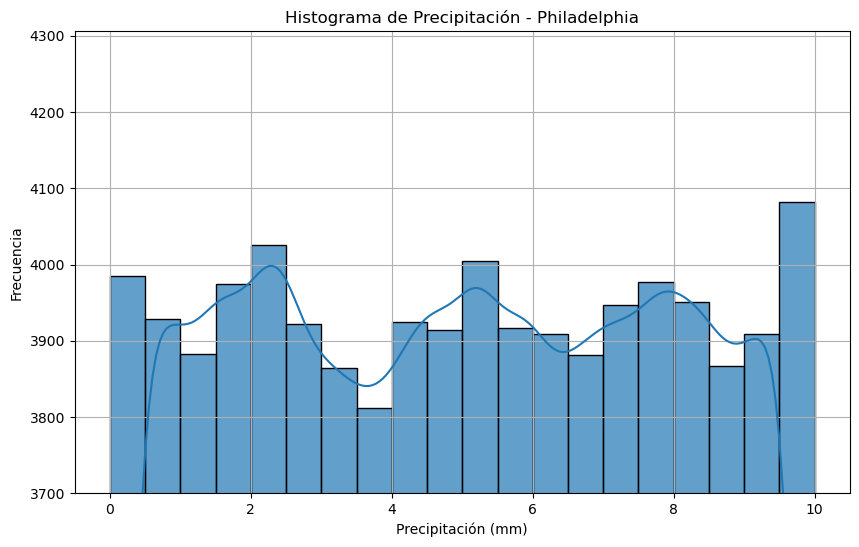

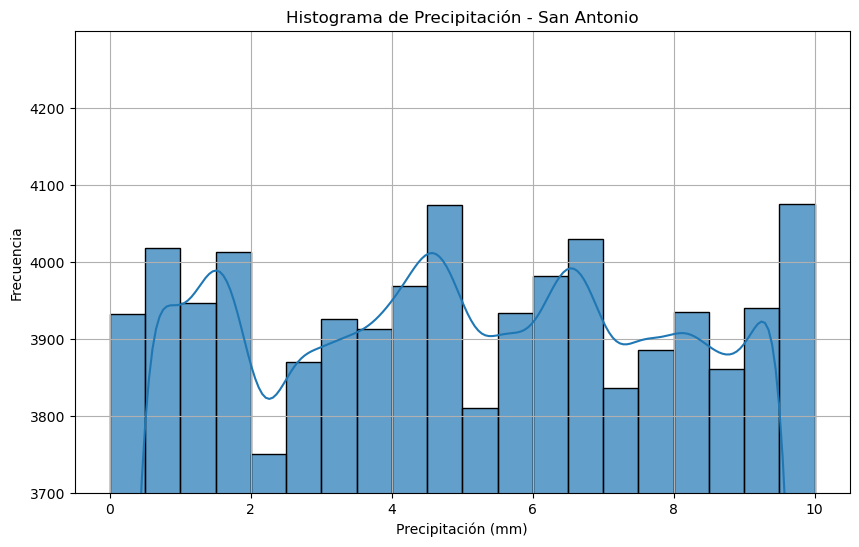

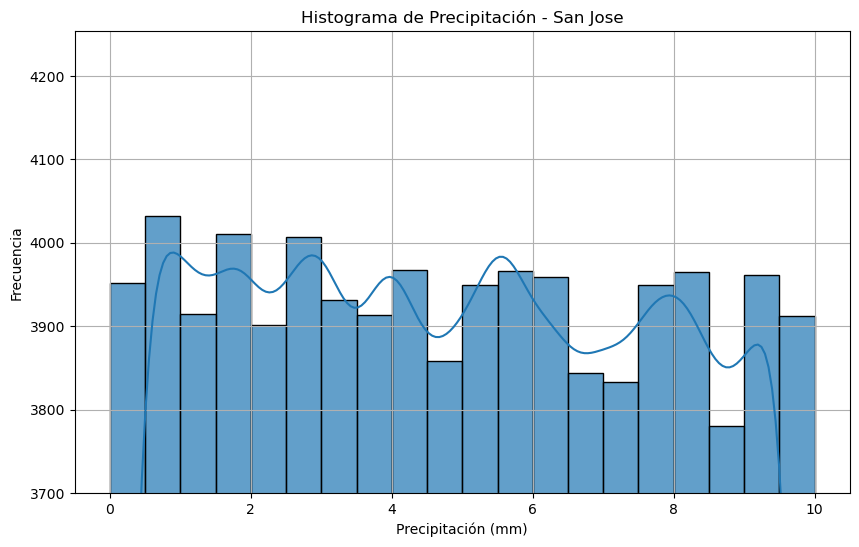

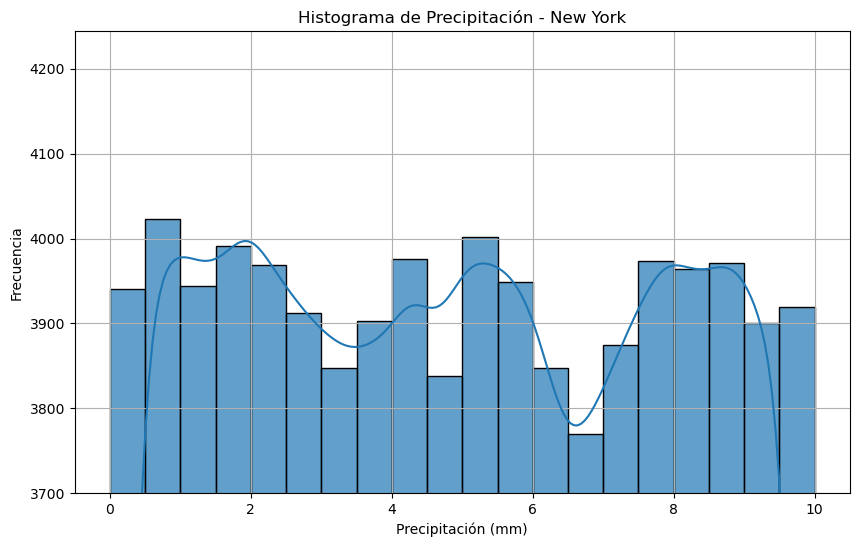

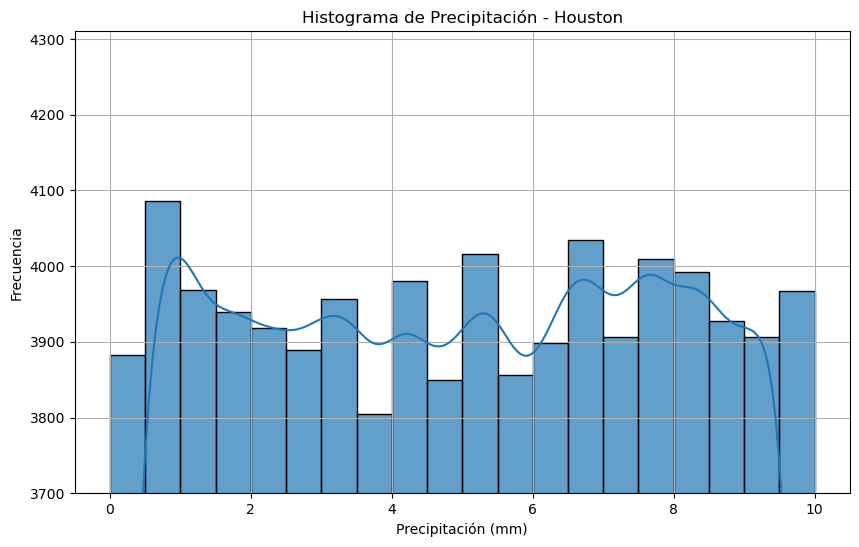

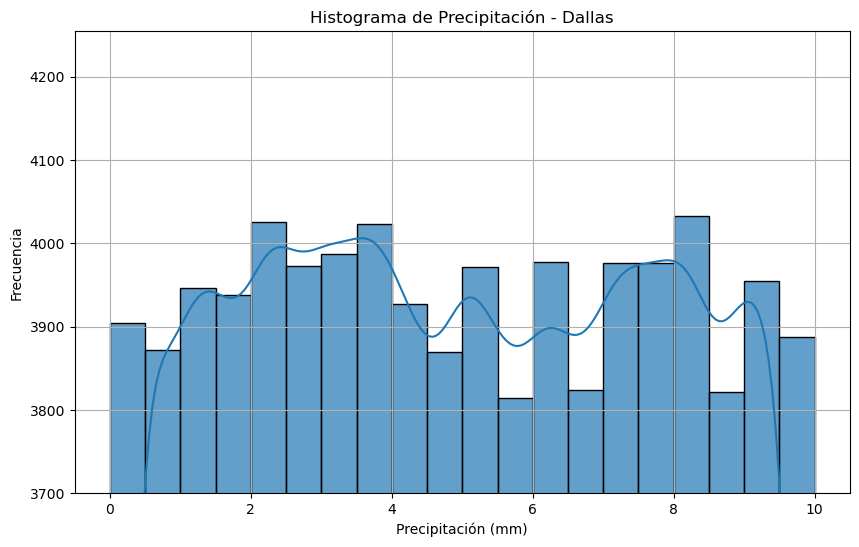

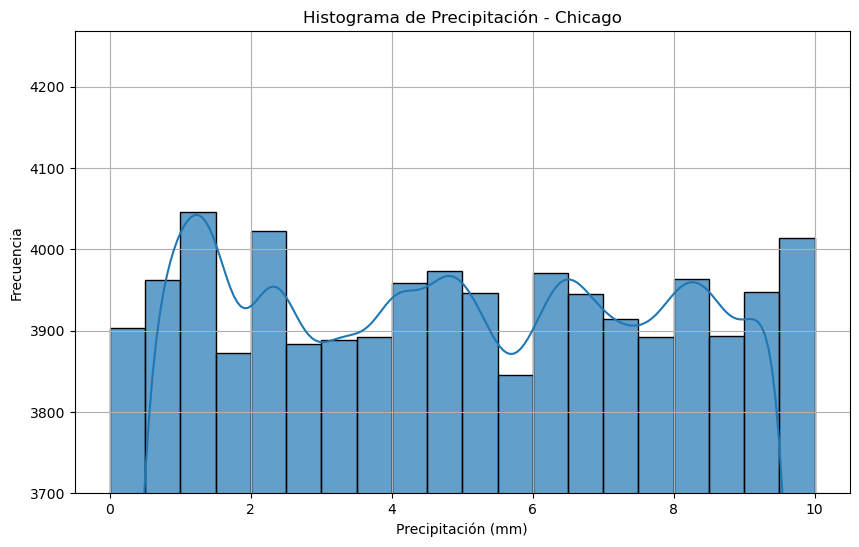

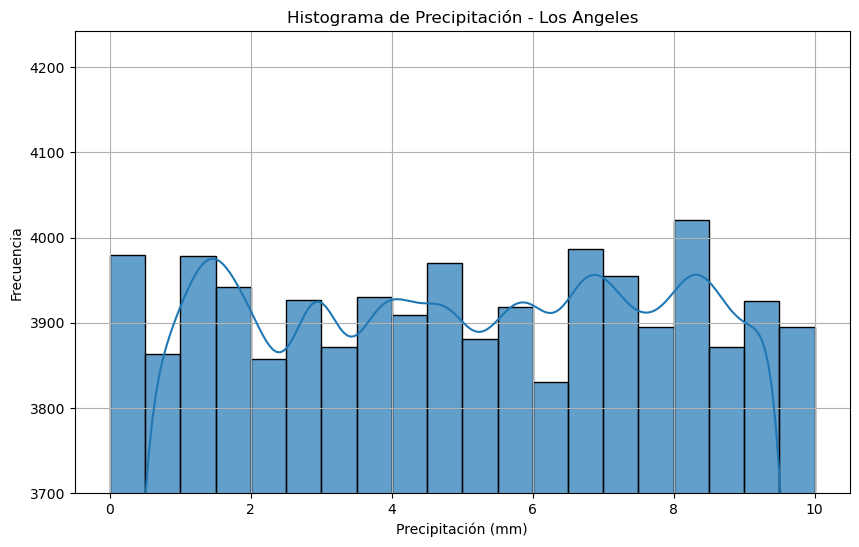

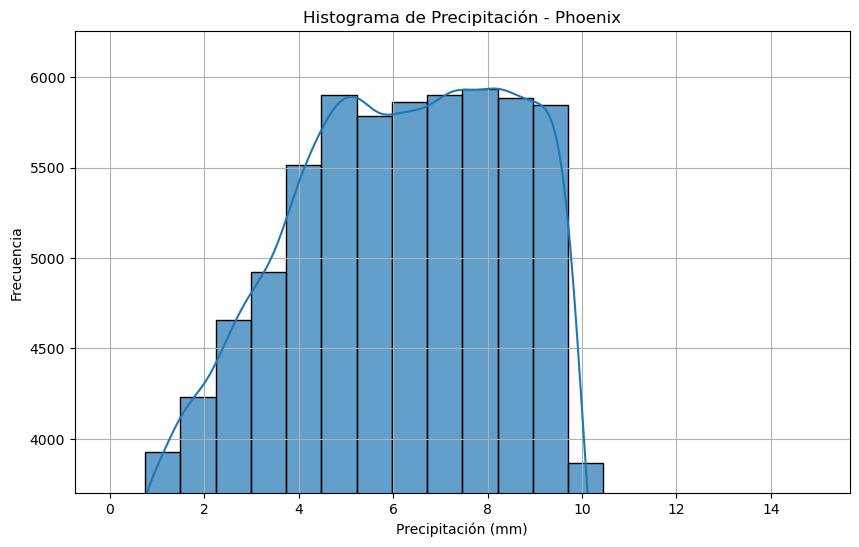

In [33]:
cities=weather_data["Location"].unique()

def hist_prec(data,cities):
    for city in cities:
        df_ciudad = data[data['Location'] == city]
        # Crear un histograma de precipitación
        plt.figure(figsize=(10, 6))
        ax=sns.histplot(df_ciudad['Precipitation (mm)'], bins=20,kde=True, edgecolor='k', alpha=0.7)
        ax.set_title(f'Histograma de Precipitación - {city}')
        ax.set_xlabel('Precipitación (mm)')
        ax.set_ylabel('Frecuencia')
        ax.set_ylim(3700,ax.get_ylim()[1] +20)
        plt.grid(True)
    plt.show()

hist_prec(weather_data,cities)

A continuación se creó la función **graficar_max_temperatura** para realizar un barplot de las temperaturas máximas de las ciudades presentes en el estudio.

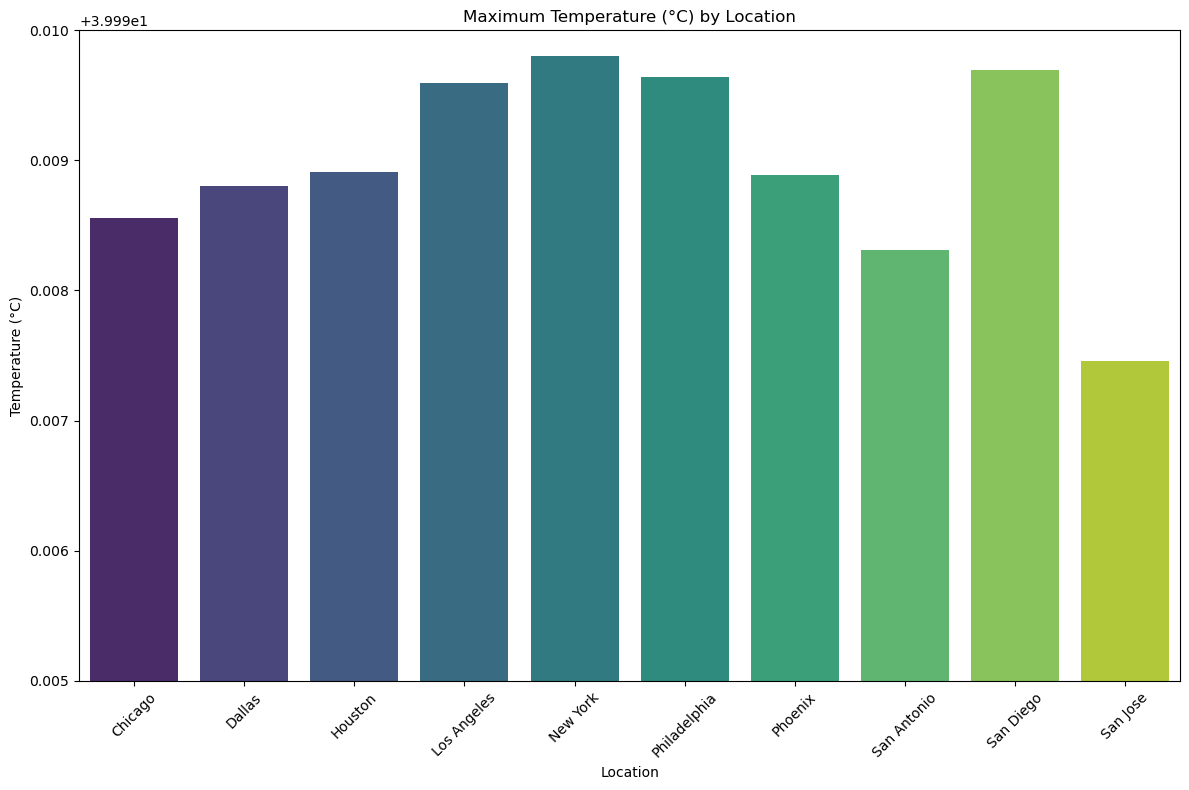

In [34]:
# Función para guardar el máximo de temperatura por ubicación
max_temperatura = weather_data.groupby("Location")["Temperature (°C)"].max().reset_index()

def graficar_max_temperatura(data, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(data=data, x=xlabel, y=ylabel, palette="viridis", ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_ylim(39.995,40.00)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Guardar la imagen
    fig_filename = "Max_Temperature_All_Locations.png"
    fig.savefig(fig_filename, dpi=400)
    plt.show()

# Llamada a la función
graficar_max_temperatura(max_temperatura, xlabel="Location", ylabel="Temperature (°C)", title="Maximum Temperature (°C) by Location")

## Conclusiones y recomendaciones

Del trabajo realizado se puede concluir lo siguiente:

- Las ciudades de Estados Unidos incluidas en el estudio presentan parámetros hidroclimáticos similares que convergen a un valor específico, esto se evidenció en los cálculos realizados por agrupación, donde el promedio entre ciudades de varios parámetros difieren en un orden de magnitud de décimas y centésimas.
- Esta última aseveración fue decisiva para la representación de datos, donde se necesita de delimitaciones de límite que muestren el comportamiento específico de cada ciudad en el conjunto.
- Gran parte de las ciudades tienen episodios de estabilidad de parámetros climáticos a lo largo del periodo analizado, lo que puede indicar presencia de una alternancia de frentes fríos y cálidos en este periodo.
- En general, se evidencia el cambio de la estacionalidad climática del país, teniendo proporciones iguales de frecuencia de datos característicos de temperaturas cálidas y frías.

## Referencias

[1]	INESDI, “Analítica de datos: qué es, para qué sirve y ejemplos | INESDI,” Apr. 19, 2022. https://www.inesdi.com/blog/analitica-datos-ciberseguridad/ (accessed Jun. 26, 2024).

[2]	C. E. F. Monjardin, C. Power, D. B. Senoro, and K. L. M. De Jesus, “Application of Machine Learning for Prediction and Monitoring of Manganese Concentration in Soil and Surface Water,” Water 2023, Vol. 15, Page 2318, vol. 15, no. 13, p. 2318, Jun. 2023, doi: 10.3390/W15132318.

[3]	S. Pursell, “Guía completa para el análisis de datos (con ejemplos),” Nov. 15, 2022. https://blog.hubspot.es/marketing/analisis-de-datos (accessed Jun. 26, 2024).

[4]	“CODEa UNI.” https://www.codeauni.com/comunidad/blog/71/ (accessed Jun. 11, 2024).



### [GIT HUB](https://github.com/cindy-goyburo/bases-project)